# Decision making under uncertainty

In this lecture, you learned about how the Markov decision process (MDP) framework can be extended to allow uncertainty about the states. This can be used to model a wide range of decision-making problems where there is uncertainty or noise associated with the state of the world.

We considered the example of the random dot motion discrimination task, where a subject must indicate the direction in which the majority of dots are moving. In this assignment, you will solve a two-stage formulation of this task, where the decision-maker can either make an immediate decision (i.e., at the first stage) on the basis of initial information, or choose to wait and gather further information before making their choice (i.e., at the second stage). The complete description of the problem can be found in the lecture slides and also in the original paper: http://www.gatsby.ucl.ac.uk/~dayan/papers/NDM002wc.pdf

Your task is to reproduce the plots from Figure 9 of the paper, interpret the results, and explain the steps of the solution.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## 0. Define the parameters of the model (0.5 pts)

In [17]:
# INSERT CODE HERE
mean1 = 6
mean2 = 4
sigma = 1
r_c_3_4 = -0.1
r_3 = [1,0]
r_4 = [0,1]
r_1 = [1,0]
r_2 = [0,1]


## 1. Updating the belief state  (2.5 pts)
The actual direction of motion ('state') is not completely observable to the subject. Hence, the subject can only rely on observations to compute the *belief* that the direction of motion is left or right (this is the posterior probability or 'belief state'). 

### 1a. Write a function that will calculate this posterior given the prior belief and an observation (the belief update). (0.5 pt)

In [18]:
# INSERT CODE BELOW
import scipy.stats

def cal_posterior(c=0):
    """ These are the cues or oberservations in the given state """
    p_c_given_x1 = scipy.stats.norm.pdf(c,  loc = mean1, scale = sigma)
    p_c_given_x2 = scipy.stats.norm.pdf(c,  loc = mean2, scale = sigma)
    
    """ These are the prior probabilities of the states """
    prior = 0.5
    
    """ Calulating the posterior probabilities by applying Bayes rule """
    p_x1_given_c = (prior * p_c_given_x1) / (prior * p_c_given_x1 + prior * p_c_given_x2)
    p_x2_given_c = (prior * p_c_given_x2) / (prior * p_c_given_x1 + prior * p_c_given_x2)
    

    return p_x1_given_c, p_x2_given_c

cal_posterior(1)

(0.0003353501304664781, 0.9996646498695335)

### 1b. Use this function to update the belief on the first observation at step $\beta$ and reproduce Fig 9A.  Interpret the plot. (1 pt)

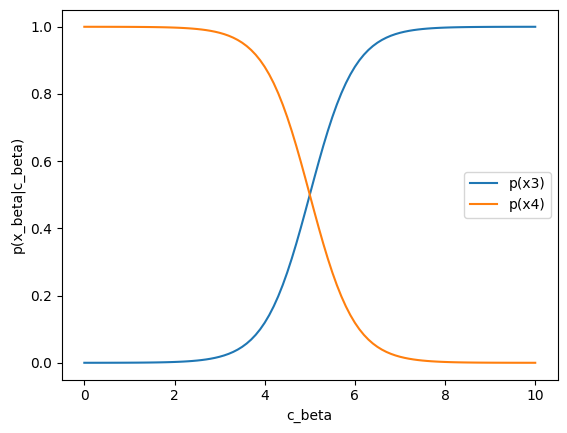

In [19]:
# INSERT CODE BELOW
lower_border = 0
upper_border = 10
step = 0.1

c_array = np.arange(lower_border, upper_border + step, step)

posteriors = np.zeros((len(c_array), 2))

""" Loop through all possible cues and calculate the posterior probability for each cue """
for idx, c in enumerate(c_array):
    posteriors[idx,:] = cal_posterior(c)
    
    
import seaborn as sns
g1 = sns.lineplot(x=c_array, y=posteriors[:,0], label='p(x3)')
g1 = sns.lineplot(x=c_array, y=posteriors[:,1], label='p(x4)')
g1.set(xlabel='c_beta', ylabel='p(x_beta|c_beta)')

""" Ignore the future warnings from seaborn"""
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)



INSERT ANSWER BELOW

The observations in the first stage are varied. If c_beta is very high this would mean we saw dots moving only to the right. Conversely, if c_beta is very low we see dots moving only to the left. If c_beta is in the middle we have a random moving pattern, since some dots are moving to the right and some to the left. If we have a strong cue or c_beta we have a high probability to be in the corresponding belief state. This means we are in the belief state that the dots are moving right. If we have a weak c_beta, we have a low probability of being in the corresponding belief state and the opposite belief state. This means we are in the belief state that the dots are moving left.

### 1c. Write a function to update the belief on observing another sample at step $\alpha$ and reproduce Fig 9B.  Interpret the plot. (1 pt)
Hint: You will have to calculate this probability for every possible pair of observations.

In [20]:
# INSERT CODE BELOW

def update_belief(c_beta, c_alpha):

    """ The probabilities of the cues given the states """
    p_c_alpha_given_x1 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_alpha)
    p_c_alpha_given_x2 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_alpha)
    p_c_beta_given_x3 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_beta)
    p_c_beta_given_x4 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_beta)
    
    """ Calculate the current belief state py multiplying the prior belief states together 
        since they are independent."""
    """ Calulate p(x1| c_alpha and c_beta and x3) """
    p_x1_given_c_alpha_beta_x3 =  p_c_alpha_given_x1 * p_c_beta_given_x3 
    """ Calulate p(x2| c_alpha and c_beta and x4) """
    p_x2_given_c_alpha_beta_x4 =  p_c_alpha_given_x2 * p_c_beta_given_x4 

    """ Belief state of the second stage depends on both cues since we marginalize over the first stage. """
    p_x1_given_c_alpha_beta = p_x1_given_c_alpha_beta_x3 / (p_x1_given_c_alpha_beta_x3  + p_x2_given_c_alpha_beta_x4)
    
    return p_x1_given_c_alpha_beta

[Text(0.5, 23.52222222222222, 'c_beta'),
 Text(50.722222222222214, 0.5, 'c_alpha')]

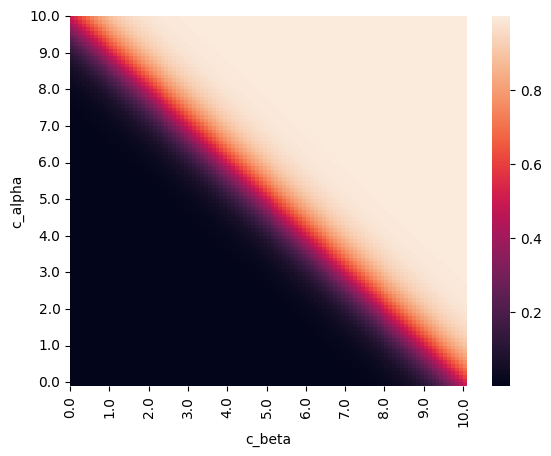

In [21]:
lower_border = 0
upper_border = 10
step = 0.1

c_array = np.arange(lower_border, upper_border + step, step)

update_beiefs= np.zeros((len(c_array), len(c_array)))

""" Loop through all possible cues and calculate the posterior probability for each cue """
for idx_alpha, c_alpha in enumerate(c_array):
    for idx_beta, c_beta in enumerate(c_array):
        update_beiefs[len(c_array) - idx_beta - 1, idx_alpha] = update_belief(c_beta, c_alpha)
        
import seaborn as sns
g1 = sns.heatmap(update_beiefs)
g1.set(xticks=np.arange(0, len(c_array), 10), xticklabels=np.arange(lower_border, upper_border + step, step)[::10])
g1.set(yticks=np.arange(0, len(c_array), 10), yticklabels=np.arange(lower_border, upper_border + step, step)[::-10])
g1.set(xlabel='c_beta', ylabel='c_alpha')
 

INSERT ANSWER BELOW
This graph shows that the probability of being in the corresponding belief state depends on both observations in the stages. This is obvious since for calculating the combined belief the beliefs are simply multiplied since they are independent in the two stages.

## 2. Solving for the optimal actions (7 pts)
Now that we have a way to update the belief states, we can use them to determine the best course of action at each of the steps (the 'optimal policy'). 

### 2a. When finding the optimal policy, why does it make sense to calculate the best action at the final stage $\alpha$, and work backwards? (1 pt)

INSERT ANSWER BELOW
The optimal policy in the first states is dependent on the states which are following. Therefore, to get the perfect result, the last states have to be updated first, and then the earlier states. This is a kind of backpropagation.

### 2b. Write a function that will calculate the value of the best action at $\alpha$ and reproduce Fig 9C. Explain what the plot shows. (1 pt)

[Text(0.5, 23.52222222222222, 'c_beta'),
 Text(50.722222222222214, 0.5, 'c_alpha')]

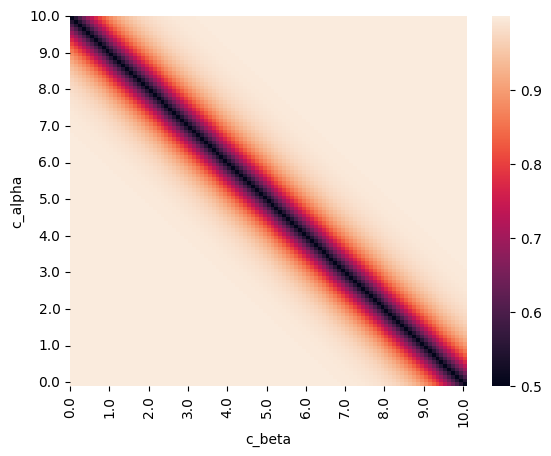

In [22]:
# INSERT CODE BELOW
def optimal_policy(posterior_x1, posterior_x2):
    v_alpha_star = np.max((posterior_x1, posterior_x2), axis=0)
    return v_alpha_star

lower_border = 0
upper_border = 10
step = 0.1

c_array = np.arange(lower_border, upper_border + step, step)

update_beliefs = np.zeros((len(c_array), len(c_array)))
v_alpha_stars = np.zeros((len(c_array), len(c_array)))

""" Loop through all possible cues and calculate the posterior probability for each cue """
for idx_alpha, c_alpha in enumerate(c_array):
    for idx_beta, c_beta in enumerate(c_array):
        """ Update the posterior probabilities"""
        update_beliefs[len(c_array) - idx_beta - 1 , idx_alpha] = update_belief(c_beta, c_alpha)
        """ Get the optimal policy for each posterior probability. Note: The posterior for x1 is calulated and the posterior for x2 is 1 - posterior for x1."""
        v_alpha_stars[len(c_array) - idx_beta - 1, idx_alpha] = optimal_policy(update_beliefs[len(c_array) - idx_beta - 1, idx_alpha],\
                                                                               1 - update_beliefs[len(c_array) - idx_beta - 1, idx_alpha])
        
import seaborn as sns
g1 = sns.heatmap(v_alpha_stars)
g1.set(xticks=np.arange(0, len(c_array), 10), xticklabels=np.arange(lower_border, upper_border + step, step)[::10])
g1.set(yticks=np.arange(0, len(c_array), 10), yticklabels=np.arange(lower_border, upper_border + step, step)[::-10])
g1.set(xlabel='c_beta', ylabel='c_alpha')

INSERT ANSWER BELOW
This figure displays the optimal policy for which action to choose in states x1 and x2. This graph shows if similar cues in both stages are observed, that the V* is very high, or in other words, the decision is very easy. However, if a very strong observation occurs in the first stage e.g. the dots are moving to the right (c_beat = 8) and in the second stage a seemingly contradicting or opposite observation is made e.g. the dots are moving to the left (c_alpha = 2), the V* is very low since then it is very hard to make a decision. Therefore, it is more like random guessing.

### 2c. Before finding the best action at $\beta$, we have one more step to do. We need the values of the best actions at $\alpha$ that we just calculated and the probability of observing $c_{\alpha}$ given $c_{\beta}$ ($P(c_{\alpha} | c_{\beta})$). Why? (1 pt)

INSERT ANSWER BELOW
Since the agent can decide on one action at state beta, the agent has to calculate the probability of observing the same cues or observation in the state alpha. If the probability of observing the same is very high, the agent will make a decision directly at the first state. Else the agent will go to the second stage and make there the decision.

### 2d. Write a function that will calculate $P(c_{\alpha} | c_{\beta})$ and reproduce Fig 9D. Explain how you calculated this probability and what the plot shows. (1 pt)
Hint: You will have to marginalise the posteriors over the possible states.

In [23]:
# INSERT CODE BELOW
def cal_c_alpha_given_c_beta(c_beta, c_alpha):
    p_c_alpha_given_x1 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_alpha)
    p_c_alpha_given_x2 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_alpha)
    p_c_beta_given_x3 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_beta)
    p_c_beta_given_x4 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_beta)

    """ Calculate the joint probability of the cues given the states """
    p_c_alpha_beta = p_c_alpha_given_x1 * p_c_beta_given_x3 + p_c_alpha_given_x2 * p_c_beta_given_x4
    
    """ Calculate the marginal probability of the cues given the states """
    p_c_beta = 0.5 * (p_c_beta_given_x3 + p_c_beta_given_x4)
    
    """ Calculate the conditional probability of the cues given the cues"""
    c_alpha_given_c_beta = p_c_alpha_beta / p_c_beta
    
    return c_alpha_given_c_beta

[Text(0.5, 23.52222222222222, 'c_beta'),
 Text(50.722222222222214, 0.5, 'c_alpha')]

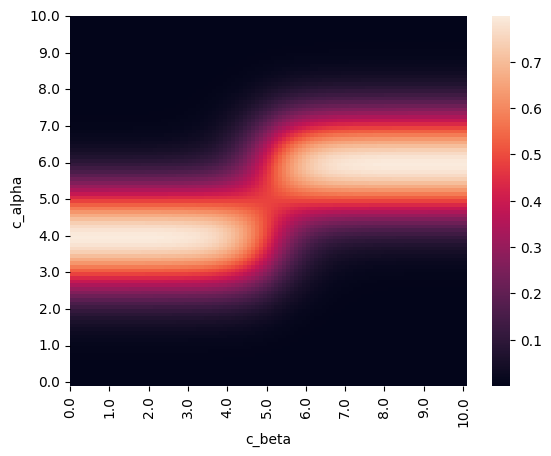

In [24]:
lower_border = 0
upper_border = 10
step = 0.1

c_array = np.arange(lower_border, upper_border + step, step)

cond_prob = np.zeros((len(c_array), len(c_array)))

""" Loop through all possible cues and calculate the posterior probability for each cue """
for idx_alpha, c_alpha in enumerate(c_array):
    for idx_beta, c_beta in enumerate(c_array):
        """ Update the posterior probabilities"""
        cond_prob[len(c_array) - idx_alpha - 1, idx_beta] = cal_c_alpha_given_c_beta(c_beta, c_alpha)

        
import seaborn as sns
g1 = sns.heatmap(cond_prob)
g1.set(xticks=np.arange(0, len(c_array), 10), xticklabels=np.arange(lower_border, upper_border + step, step)[::10])
g1.set(yticks=np.arange(0, len(c_array), 10), yticklabels=np.arange(lower_border, upper_border + step, step)[::-10])
g1.set(xlabel='c_beta', ylabel='c_alpha')

INSERT ANSWER BELOW
If the observation in state beta favors one state, e.g. c_beta = 10, the distribution is closer to this state and vice versa.

### 2e. We are now ready to find the best action at $\beta$. Write a function that calculates the values associated with each of the actions and reproduce Fig 9E. What does the plot tell you about what the best action is at $\beta$? (1 pt)
Hint: For action C, you will have to numerically integrate over possible observations ${c_{\alpha}}$ using the step size ($dc_{\alpha}$) you defined on your Gaussian observation distribution. 

In [25]:
# INSERT CODE BELOW
r_C = r_c_3_4
mean1 = 6
mean2 = 4
sigma = 1

def cal_Q_star_center(v_alpha_stars):
    
    Q_B_c_beta = np.zeros((len(c_array)))
    """ Calculate the expected value of the second stage """
    for idx_beta, c_beta in enumerate(c_array):
        
        """ Calculate the expected value of the first stage """
        Q_B_c_beta[idx_beta] = np.sum(v_alpha_stars[:,idx_beta] * cond_prob[:,idx_beta] / np.sum(cond_prob[:, idx_beta]))
        
        """ Add the reward of the second stage """
        Q_B_c_beta[idx_beta] += r_C


    return Q_B_c_beta


Q_star_center = cal_Q_star_center(v_alpha_stars)



def cal_posterior_first_state(c=0):
    """ These are the cues or oberservations in the given state """
    p_c_given_x3 = scipy.stats.norm.pdf(c,  loc = mean1, scale = sigma)
    p_c_given_x4 = scipy.stats.norm.pdf(c,  loc = mean2, scale = sigma)
    
    """ These are the prior probabilities of the states """
    prior = 0.5
    
    """ Calulating the posterior probabilities by applying Bayes rule """
    p_x3_given_c = (prior * p_c_given_x3) / (prior * p_c_given_x3 + prior * p_c_given_x4)
    p_x4_given_c = (prior * p_c_given_x4) / (prior * p_c_given_x3 + prior * p_c_given_x4)
    

    return p_x3_given_c, p_x4_given_c



def update_belief_second_state(c_beta, c_alpha):

    """ The probabilities of the cues given the states """
    p_c_alpha_given_x1 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_alpha)
    p_c_alpha_given_x2 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_alpha)
    p_c_beta_given_x3 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_beta)
    p_c_beta_given_x4 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_beta)
    
    """ Calculate the current belief state py multiplying the prior belief states together 
        since they are independent."""
    """ Calulate p(x1| c_alpha and c_beta and x3) """
    p_x1_given_c_alpha_beta_x3 =  p_c_alpha_given_x1 * p_c_beta_given_x3 
    """ Calulate p(x2| c_alpha and c_beta and x4) """
    p_x2_given_c_alpha_beta_x4 =  p_c_alpha_given_x2 * p_c_beta_given_x4 

    """ Belief state of the second stage depends on both cues since we marginalize over the first stage. """
    p_x1_given_c_alpha_beta = p_x1_given_c_alpha_beta_x3 / (p_x1_given_c_alpha_beta_x3  + p_x2_given_c_alpha_beta_x4)
    
    
    return p_x1_given_c_alpha_beta, 1 - p_x1_given_c_alpha_beta


def Cal_Q_star():
    Q_star = np.zeros(len(c_array))
    max_first_state, max_second_state = 0, 0
 
                                
    for idx_beta, c_beta in enumerate(c_array):
        max_first_state = max(cal_posterior_first_state(c_beta))
        
        max_second_state_alphas = np.zeros(len(c_array))
        for idx_alpha, c_alpha in enumerate(c_array):
            p_x1_c_alpha_beta_x3, p_x2_given_c_alpha_beta_x4 = update_belief_second_state(c_beta, c_alpha)
            max_second_state_alphas[idx_alpha] = r_C + max(p_x1_c_alpha_beta_x3, p_x2_given_c_alpha_beta_x4) * cond_prob[len(c_array) - idx_alpha - 1, idx_beta]
            

        max_second_state = max(max_second_state_alphas)
        Q_star[idx_beta] = max(max_first_state, max_second_state)
        
    return Q_star


Q_star = Cal_Q_star()


[(0.4, 1.1), Text(0.5, 0, 'c_beta'), Text(0, 0.5, 'Q_star')]

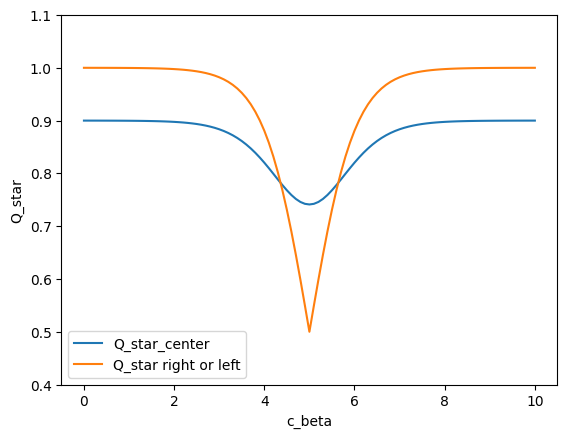

In [26]:
g1 = sns.lineplot(x=c_array, y=Q_star_center, label='Q_star_center')
g1 = sns.lineplot(x=c_array, y=Q_star, label = 'Q_star right or left')
""" Set the legend to the bottom left corner """
g1.legend(loc='lower left')
g1.set(ylim=(0.4,1.1), xlabel='c_beta', ylabel='Q_star')


INSERT ANSWER BELOW

### 2f. What will reduce (or increase) the range of observations at $\beta$ where it is best to choose to wait for another observation (choosing C)? Can you tweak a parameter to do this and produce a plot similar to Fig 9E to show this? (2 pts)
Hint: You will have to re-run the steps with this changed parameter. 

[Text(0.5, 23.52222222222222, 'c_beta'),
 Text(50.722222222222214, 0.5, 'c_alpha')]

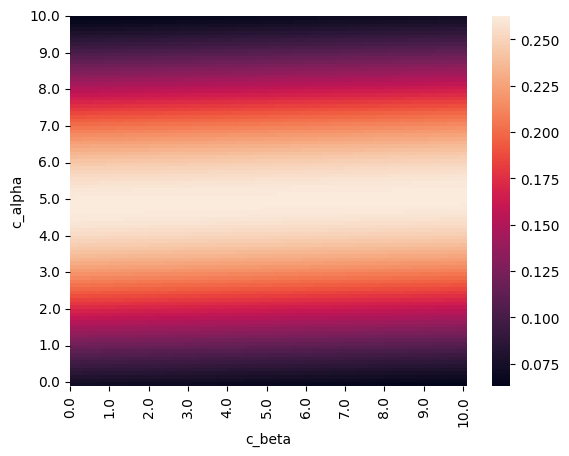

In [27]:
# INSERT CODE BELOW

r_C = -0.05
mean1 = 5.5
mean2 = 4.5
sigma = 3

lower_border = 0
upper_border = 10
step = 0.1

c_array = np.arange(lower_border, upper_border + step, step)

cond_prob = np.zeros((len(c_array), len(c_array)))

# INSERT CODE BELOW
def cal_c_alpha_given_c_beta(c_beta, c_alpha):
    p_c_alpha_given_x1 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_alpha)
    p_c_alpha_given_x2 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_alpha)
    p_c_beta_given_x3 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_beta)
    p_c_beta_given_x4 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_beta)

    """ Calculate the joint probability of the cues given the states """
    p_c_alpha_beta = p_c_alpha_given_x1 * p_c_beta_given_x3 + p_c_alpha_given_x2 * p_c_beta_given_x4
    
    """ Calculate the marginal probability of the cues given the states """
    p_c_beta = 0.5 * (p_c_beta_given_x3 + p_c_beta_given_x4)
    
    """ Calculate the conditional probability of the cues given the cues"""
    c_alpha_given_c_beta = p_c_alpha_beta / p_c_beta
    
    return c_alpha_given_c_beta

""" Loop through all possible cues and calculate the posterior probability for each cue """
for idx_alpha, c_alpha in enumerate(c_array):
    for idx_beta, c_beta in enumerate(c_array):
        """ Update the posterior probabilities"""
        cond_prob[len(c_array) - idx_alpha - 1, idx_beta] = cal_c_alpha_given_c_beta(c_beta, c_alpha)

        
import seaborn as sns
g1 = sns.heatmap(cond_prob)
g1.set(xticks=np.arange(0, len(c_array), 10), xticklabels=np.arange(lower_border, upper_border + step, step)[::10])
g1.set(yticks=np.arange(0, len(c_array), 10), yticklabels=np.arange(lower_border, upper_border + step, step)[::-10])
g1.set(xlabel='c_beta', ylabel='c_alpha')


In [28]:
def cal_Q_star_center(v_alpha_stars):
    
    Q_B_c_beta = np.zeros((len(c_array)))
    """ Calculate the expected value of the second stage """
    for idx_beta, c_beta in enumerate(c_array):
        
        """ Calculate the expected value of the first stage """
        Q_B_c_beta[idx_beta] = np.sum(v_alpha_stars[:,idx_beta] * cond_prob[:,idx_beta] / np.sum(cond_prob[:, idx_beta]))
        
        """ Add the reward of the second stage """
        Q_B_c_beta[idx_beta] += r_C


    return Q_B_c_beta


Q_star_center = cal_Q_star_center(v_alpha_stars)



def cal_posterior_first_state(c=0):
    """ These are the cues or oberservations in the given state """
    p_c_given_x3 = scipy.stats.norm.pdf(c,  loc = mean1, scale = sigma)
    p_c_given_x4 = scipy.stats.norm.pdf(c,  loc = mean2, scale = sigma)
    
    """ These are the prior probabilities of the states """
    prior = 0.5
    
    """ Calulating the posterior probabilities by applying Bayes rule """
    p_x3_given_c = (prior * p_c_given_x3) / (prior * p_c_given_x3 + prior * p_c_given_x4)
    p_x4_given_c = (prior * p_c_given_x4) / (prior * p_c_given_x3 + prior * p_c_given_x4)
    

    return p_x3_given_c, p_x4_given_c



def update_belief_second_state(c_beta, c_alpha):

    """ The probabilities of the cues given the states """
    p_c_alpha_given_x1 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_alpha)
    p_c_alpha_given_x2 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_alpha)
    p_c_beta_given_x3 = scipy.stats.norm(loc = mean1, scale = sigma).pdf(c_beta)
    p_c_beta_given_x4 = scipy.stats.norm(loc = mean2, scale = sigma).pdf(c_beta)
    
    """ Calculate the current belief state py multiplying the prior belief states together 
        since they are independent."""
    """ Calulate p(x1| c_alpha and c_beta and x3) """
    p_x1_given_c_alpha_beta_x3 =  p_c_alpha_given_x1 * p_c_beta_given_x3 
    """ Calulate p(x2| c_alpha and c_beta and x4) """
    p_x2_given_c_alpha_beta_x4 =  p_c_alpha_given_x2 * p_c_beta_given_x4 

    """ Belief state of the second stage depends on both cues since we marginalize over the first stage. """
    p_x1_given_c_alpha_beta = p_x1_given_c_alpha_beta_x3 / (p_x1_given_c_alpha_beta_x3  + p_x2_given_c_alpha_beta_x4)
    
    
    return p_x1_given_c_alpha_beta, 1 - p_x1_given_c_alpha_beta


def Cal_Q_star():
    Q_star = np.zeros(len(c_array))
    max_first_state, max_second_state = 0, 0
 
                                
    for idx_beta, c_beta in enumerate(c_array):
        max_first_state = max(cal_posterior_first_state(c_beta))
        
        max_second_state_alphas = np.zeros(len(c_array))
        for idx_alpha, c_alpha in enumerate(c_array):
            p_x1_c_alpha_beta_x3, p_x2_given_c_alpha_beta_x4 = update_belief_second_state(c_beta, c_alpha)
            max_second_state_alphas[idx_alpha] = r_C + max(p_x1_c_alpha_beta_x3, p_x2_given_c_alpha_beta_x4) * cond_prob[len(c_array) - idx_alpha - 1, idx_beta]
            

        max_second_state = max(max_second_state_alphas)
        Q_star[idx_beta] = max(max_first_state, max_second_state)
        
    return Q_star


Q_star = Cal_Q_star()


[(0.4, 1.1), Text(0.5, 0, 'c_beta'), Text(0, 0.5, 'Q_star')]

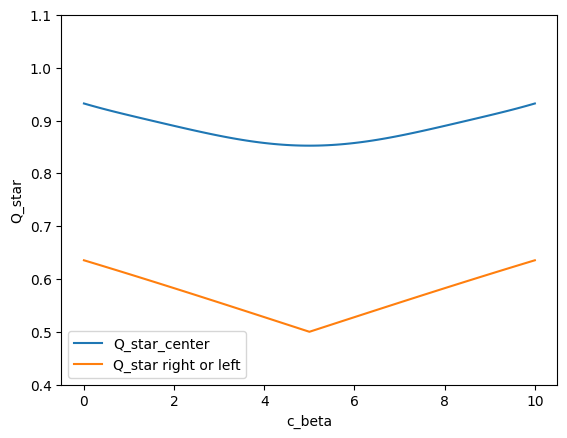

In [29]:
g1 = sns.lineplot(x=c_array, y=Q_star_center, label='Q_star_center')
g1 = sns.lineplot(x=c_array, y=Q_star, label = 'Q_star right or left')
""" Set the legend to the bottom left corner """
g1.legend(loc='lower left')
g1.set(ylim=(0.4,1.1), xlabel='c_beta', ylabel='Q_star')

INSERT ANSWER BELOW

If the punishment is decreased, the agent will wait and will do the action C more often. Also shifting the mean or variance of the distributions of the observations or cues will affect the agent. If the distributions are closer together or the variance is bigger, the distributions are more overlapping. Therefore, it makes more sense to wait and sample more information to make a better decision. Noticeably, the conditional probability for getting $P(c_{\alpha} | c_{\beta})$ is also much smaller since you could say there is a lot of noise. Further, it is noticable the slopes of the curves are more shallower since there cues are not very unambigous.